1 - Faites un prétraitement du dataset:
	- Chercher les valeurs Nan
	- Visualisation
	- Supprimez les colonnes inutiles 
	- Afficher le nombre de classes



2- proposez un modèle de classification par (SVM ou RL, RandomForest)

3- proposez un modèle de classification par réseau de neurones 


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv("star_classification.csv")

In [3]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df.shape

(100000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [7]:
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

VISUALIZATION


<Axes: ylabel='count'>

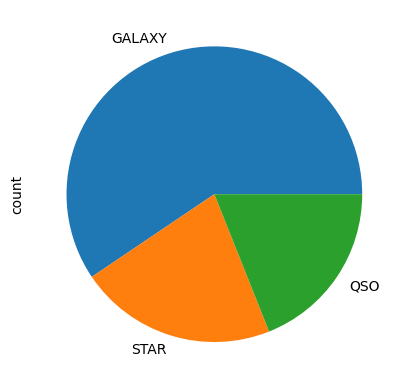

In [8]:
df['class'].value_counts().plot.pie()

<Axes: >

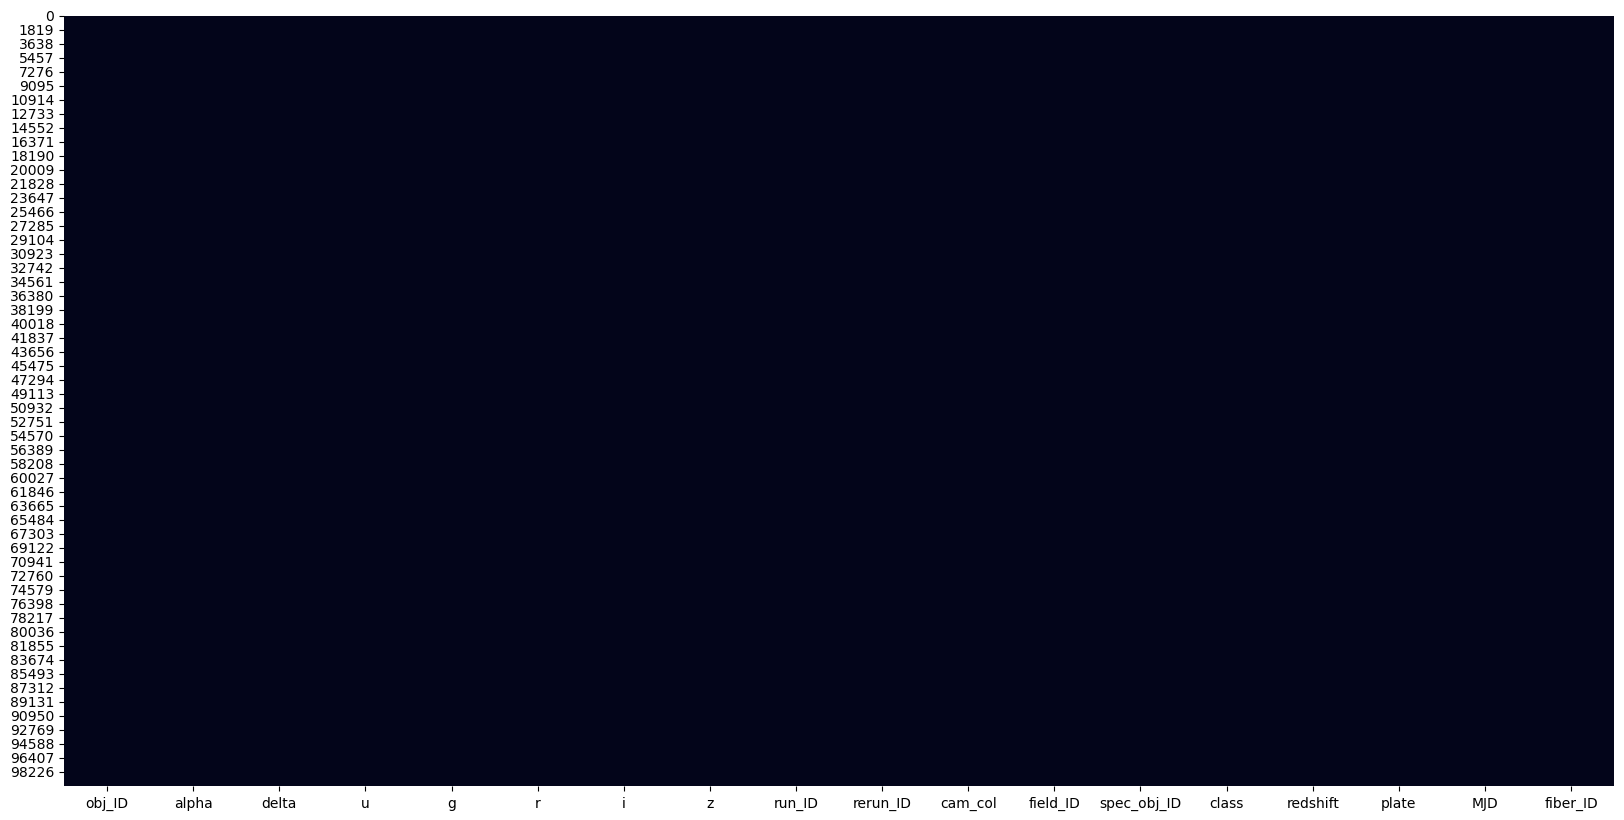

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

1- REMOVE Unecessary Columns

In [9]:
empty_col = ['rerun_ID', 'obj_ID', 'run_ID', 'field_ID', 'fiber_ID', 'spec_obj_ID']

In [10]:
clean_data = df.drop(columns=empty_col, errors='ignore')

New Clean CSV FILE

In [11]:
clean_data.to_csv('clean_data.csv', index=False)

In [12]:
clean_data.head()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,6121,56187


In [13]:
final_df = pd.read_csv("clean_data.csv")

C:\Users\marwan\AppData\Local\Temp\ipykernel_18220\4278873127.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\marwan\AppData\Local\Temp\ipykernel_18220\4278873127.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\marwan\AppData\Local\Temp\ipykernel_18220

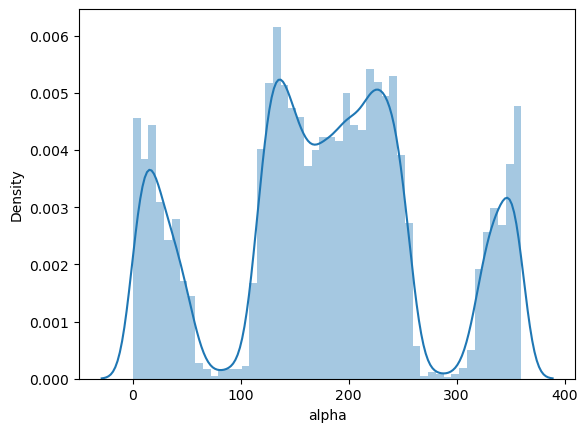

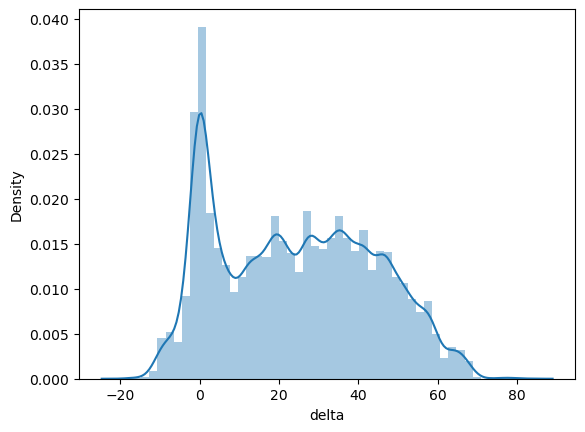

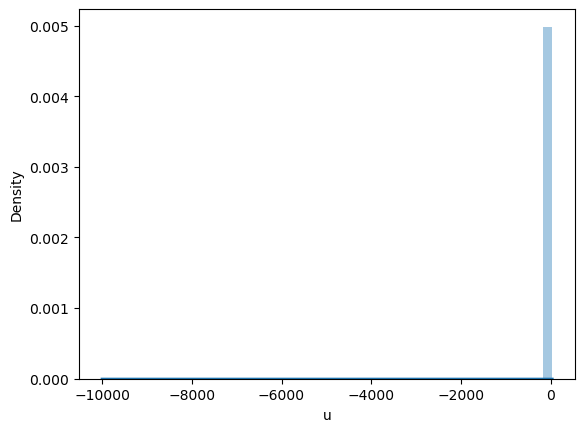

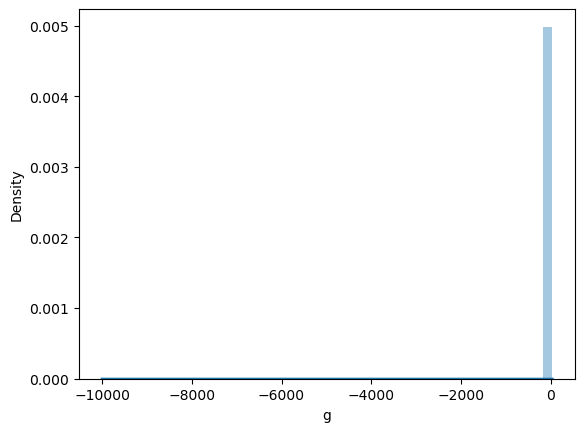

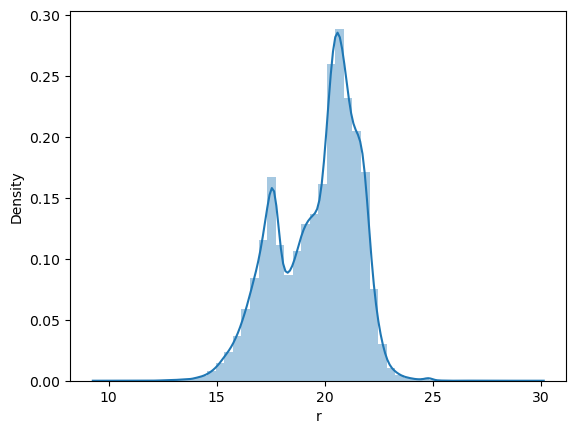

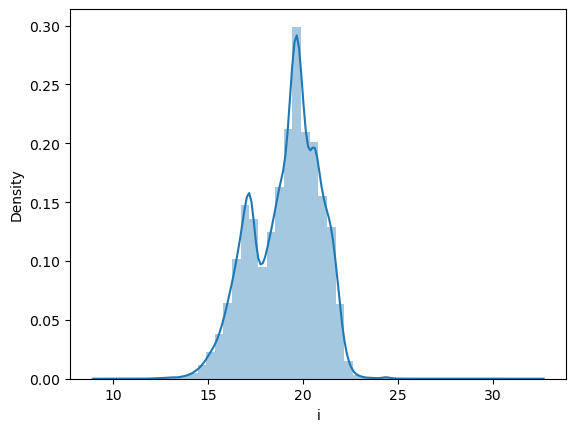

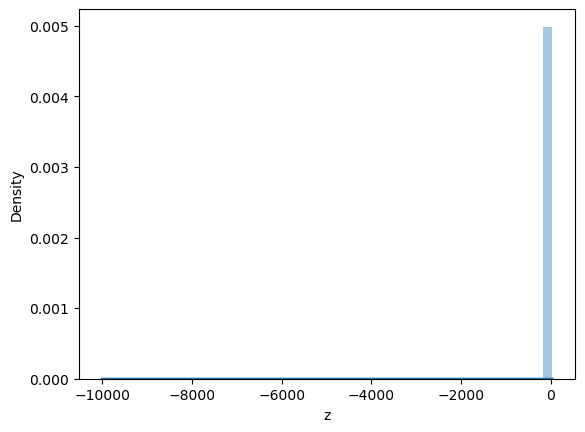

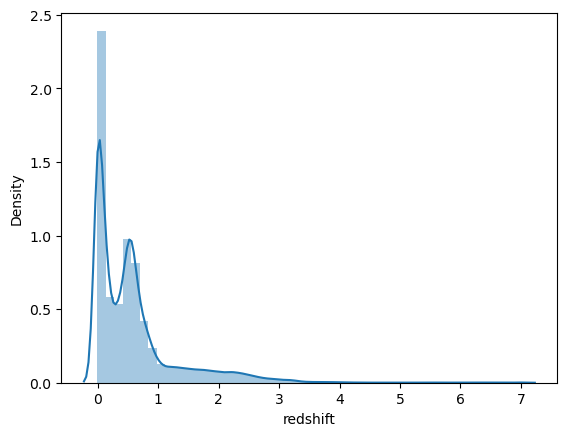

In [35]:
for col in final_df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [40]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'class'
label_encoder = LabelEncoder()
final_df['class_encoded'] = label_encoder.fit_transform(final_df['class'])

NameError: name 'LabelEncoder' is not defined

In [14]:
from sklearn.ensemble import RandomForestClassifier        #Initialize and training
from sklearn.model_selection import train_test_split        #split Train / Test


In [15]:
X = final_df.drop(['class'], axis=1)
y = final_df['class']

y.replace({"GALAXY":0,"QSO":1,"STAR":2},inplace=True)




In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [17]:
#Split the data into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Making Prediction on Test Set

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

Making Prediction on Test Set

In [20]:
y_pred = model.predict(X_test)

In [21]:
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"train: {model.score(X_train, y_train):.2f}")
print(f"test: {model.score(X_test, y_test):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11860
           1       0.97      0.93      0.95      3797
           2       0.99      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000

train: 1.00
test: 0.98


COMPUTE

In [22]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


Display Confusion Matrix

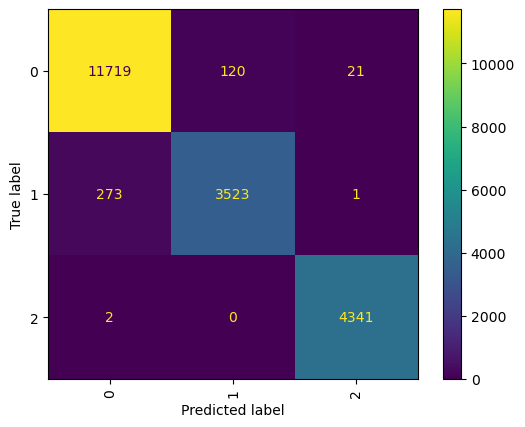

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)


# Plot the confusion matrix
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.show()